### Importação das bibliotecas

In [27]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


In [28]:
url = "https://community.watsonanalytics.com/wp-content/uploads/2015/04/WA_Fn-UseC_-Sales-Win-Loss.csv"
sales_data = pd.read_csv(url)

### Visualizar as variaveis

In [29]:
sales_data.head(50)

,Opportunity Number,Supplies Subgroup,Supplies Group,Region,Route To Market,Elapsed Days In Sales Stage,Opportunity Result,Sales Stage Change Count,Total Days Identified Through Closing,Total Days Identified Through Qualified,Opportunity Amount USD,Client Size By Revenue,Client Size By Employee Count,Revenue From Client Past Two Years,Competitor Type,Ratio Days Identified To Total Days,Ratio Days Validated To Total Days,Ratio Days Qualified To Total Days,Deal Size Category
0,1641984,Exterior Accessories,Car Accessories,Northwest,Fields Sales,76,Won,13,104,101,0,5,5,0,Unknown,0.696360,0.113985,0.154215,1
1,1658010,Exterior Accessories,Car Accessories,Pacific,Reseller,63,Loss,2,163,163,0,3,5,0,Unknown,0.000000,1.000000,0.000000,1
2,1674737,Motorcycle Parts,Performance & Non-auto,Pacific,Reseller,24,Won,7,82,82,7750,1,1,0,Unknown,1.000000,0.000000,0.000000,1
3,1675224,Shelters & RV,Performance & Non-auto,Midwest,Reseller,16,Loss,5,124,124,0,1,1,0,Known,1.000000,0.000000,0.000000,1
4,1689785,Exterior Accessories,Car Accessories,Pacific,Reseller,69,Loss,11,91,13,69756,1,1,0,Unknown,0.000000,0.141125,0.000000,4
5,1692390,Shelters & RV,Performance & Non-auto,Pacific,Reseller,89,Loss,3,114,0,232522,5,1,0,Unknown,0.000000,0.000877,0.000000,5
6,1935837,Garage & Car Care,Car Accessories,Pacific,Fields Sales,111,Won,12,112,112,20001,4,5,0,Unknown,0.308863,0.568487,0.122650,2
7,1952571,Exterior Accessories,Car Accessories,Pacific,Fields Sales,82,Loss,6,70,70,450000,1,1,0,Known,0.263610,0.736390,0.000000,6
8,1999486,Batteries & Accessories,Car Accessories,Northwest,Fields Sales,68,Loss,8,156,156,250000,1,5,0,None,0.000000,0.562821,0.437179,6
9,2052337,Exterior Accessories,Car Accessories,Pacific,Reseller,18,Loss,7,50,50,55003,1,1,0,Unknown,0.000000,0.585317,0.414683,4


### Visualizar os dados

0         Won
1        Loss
2         Won
3        Loss
4        Loss
5        Loss
6         Won
7        Loss
8        Loss
9        Loss
10       Loss
11       Loss
12       Loss
13       Loss
14       Loss
15        Won
16       Loss
17       Loss
18       Loss
19       Loss
20       Loss
21       Loss
22       Loss
23       Loss
24        Won
25       Loss
26       Loss
27       Loss
28       Loss
29       Loss
         ... 
77995    Loss
77996     Won
77997     Won
77998    Loss
77999    Loss
78000    Loss
78001     Won
78002    Loss
78003     Won
78004     Won
78005    Loss
78006     Won
78007    Loss
78008     Won
78009    Loss
78010    Loss
78011     Won
78012     Won
78013     Won
78014     Won
78015    Loss
78016     Won
78017     Won
78018     Won
78019     Won
78020    Loss
78021     Won
78022    Loss
78023    Loss
78024    Loss
Name: Opportunity Result, Length: 78025, dtype: object


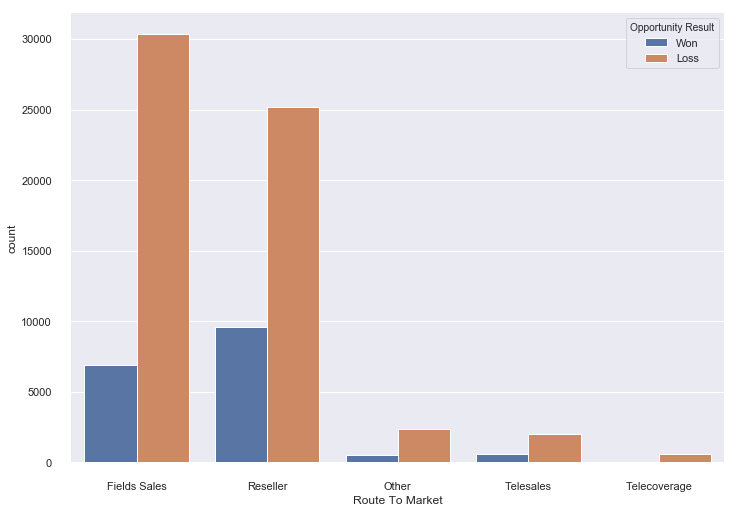

In [30]:
sns.set(style="whitegrid", color_codes=True)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot('Route To Market',data=sales_data,hue = 'Opportunity Result')

sns.despine(offset=10, trim=True)


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


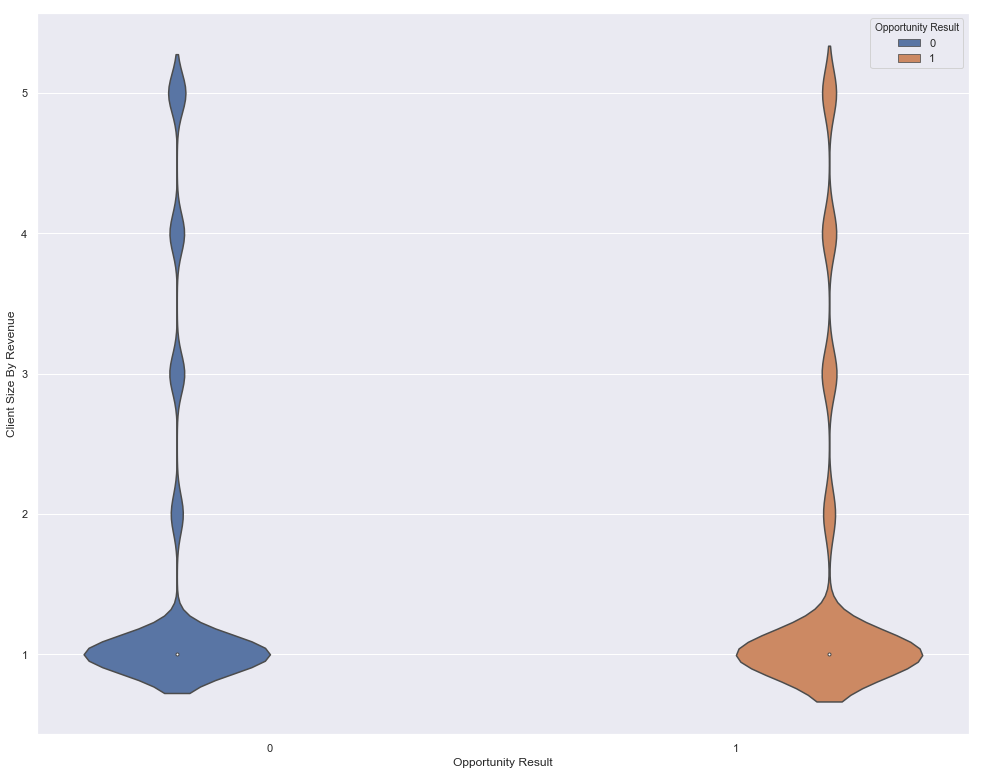

0        1
1        0
2        1
3        0
4        0
5        0
6        1
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       1
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       1
25       0
26       0
27       0
28       0
29       0
        ..
77995    0
77996    1
77997    1
77998    0
77999    0
78000    0
78001    1
78002    0
78003    1
78004    1
78005    0
78006    1
78007    0
78008    1
78009    0
78010    0
78011    1
78012    1
78013    1
78014    1
78015    0
78016    1
78017    1
78018    1
78019    1
78020    0
78021    1
78022    0
78023    0
78024    0
Name: Opportunity Result, Length: 78025, dtype: int64


In [26]:
sns.set(rc={'figure.figsize':(16.7,13.27)})
sns.violinplot(x="Opportunity Result",y="Client Size By Revenue", hue="Opportunity Result", data=sales_data);
plt.show()



In [24]:
# label_encoder = LabelEncoder()
# x = sales_data['Opportunity Result']
# sales_data['Opportunity Result Binary'] = label_encoder.fit_transform(x)


In [25]:
numeric_features = sales_data.select_dtypes(include=[np.number])
numeric_features.dtypes

Opportunity Number                           int64
Elapsed Days In Sales Stage                  int64
Opportunity Result                           int64
Sales Stage Change Count                     int64
Total Days Identified Through Closing        int64
Total Days Identified Through Qualified      int64
Opportunity Amount USD                       int64
Client Size By Revenue                       int64
Client Size By Employee Count                int64
Revenue From Client Past Two Years           int64
Ratio Days Identified To Total Days        float64
Ratio Days Validated To Total Days         float64
Ratio Days Qualified To Total Days         float64
Deal Size Category                           int64
Opportunity Result Binary                    int64
dtype: object

In [23]:
corr = numeric_features.corr()

print (corr['Opportunity Result Binary'].sort_values(ascending=False)[:10], '\n')
print (corr['Opportunity Result Binary'].sort_values(ascending=False)[-10:])
print (sales_data['Opportunity Result'])

Opportunity Result Binary             1.000000
Opportunity Result                    1.000000
Revenue From Client Past Two Years    0.277688
Ratio Days Qualified To Total Days    0.208131
Sales Stage Change Count              0.092017
Opportunity Number                    0.042167
Elapsed Days In Sales Stage          -0.016561
Client Size By Revenue               -0.017341
Client Size By Employee Count        -0.019456
Opportunity Amount USD               -0.075764
Name: Opportunity Result Binary, dtype: float64 

Opportunity Number                         0.042167
Elapsed Days In Sales Stage               -0.016561
Client Size By Revenue                    -0.017341
Client Size By Employee Count             -0.019456
Opportunity Amount USD                    -0.075764
Ratio Days Validated To Total Days        -0.172233
Deal Size Category                        -0.192270
Ratio Days Identified To Total Days       -0.201432
Total Days Identified Through Closing     -0.262864
Total Days I

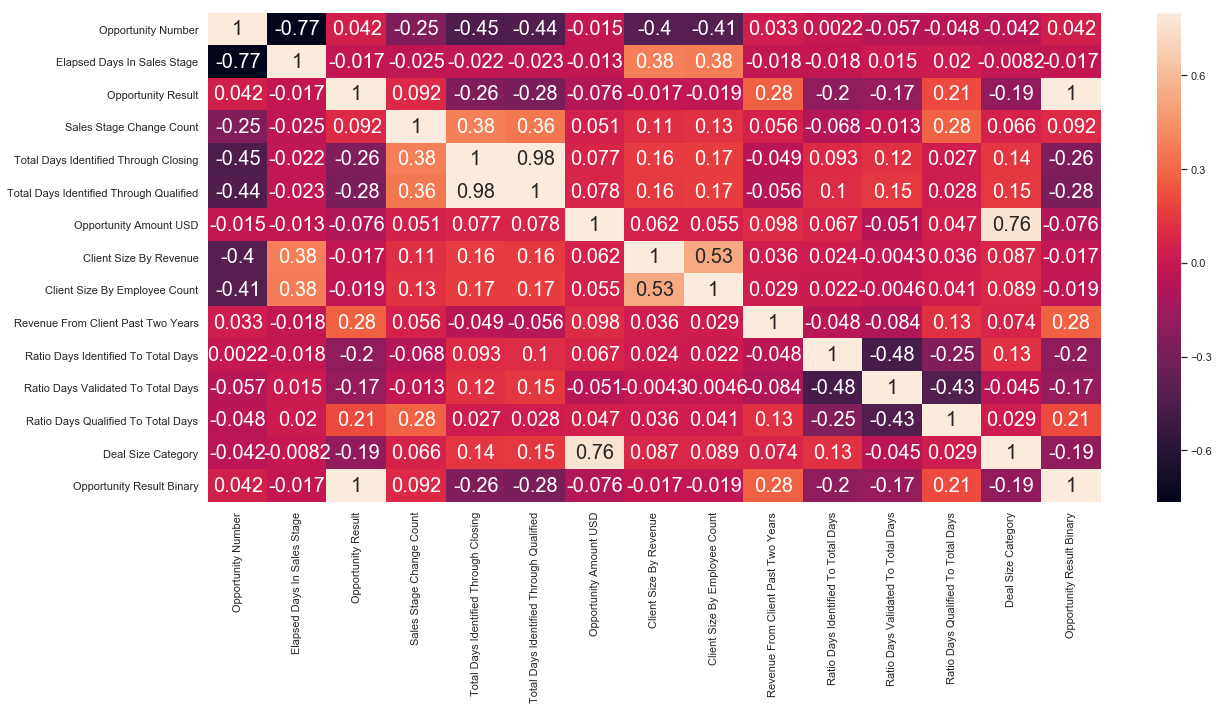

In [18]:
#correlacao matrix
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(corr, vmax=.8,annot_kws={'size': 20}, annot=True);
